# Описание набора данных

Данные взяты из открытого источника, и содержат информацию о  предполагаемом кредиторе. \
Цель: Учитывая информацию о кредитоспособности человека,
создать модель машинного обучения, которая может классифицировать кредитный рейтинг.

•	ID: Представляет уникальный идентификатор записи.\
•	Customer_ID: Представляет уникальную идентификацию человека.\
•	Month: представляет месяц года\
•	Name: Представляет имя человека\
•	Age: представляет возраст человека\
•	SSN: Представляет номер социального страхования человека.\
•	Occupation: Представляет род занятий человека.\
•	Annual_Income: представляет годовой доход человека.\
•	Monthly_Base_Salary: представляет месячную базовую зарплату человека.\
•	Num_Bank_Accounts: представляет количество банковских счетов, которыми владеет человек.\
•	Num_Credit_Card: представляет количество других кредитных карт, принадлежащих человеку.\
•	Interest_Rate: представляет процентную ставку по кредитной карте.\
•	Num_of_Loan: представляет количество кредитов, взятых в банке.\
•	Delay_from_due_date: представляет среднее количество дней, отсроченных с даты платежа.\
•	Num_of_delayed_Payment: представляет среднее количество платежей, задержанных человеком.\
•	Changed_Credit_Limit: представляет процентное изменение лимита кредитной карты.\
•	Num_Credit_Inquiries: представляет количество запросов кредитной карты\
•	Credit_Mix: представляет классификацию сочетания кредитов.\
•	Outstanding_Debt: представляет оставшуюся задолженность, подлежащую оплате (в долларах США).\
•	Credit_Utilization_Ratio: представляет коэффициент использования кредитной карты.\
•	Credit_History_Age: представляет возраст кредитной истории человека.\
•	Payment_of_Min_Amount: показывает, была ли оплачена только минимальная сумма.\
•	Total_EMI_per_month: представляет ежемесячные платежи EMI (в долларах США).\
•	Amount_invested_monthly: представляет ежемесячную сумму, инвестированную клиентом (в долларах США).\
•	Payment_Behaviour: представляет платежное поведение клиента (в долларах США).\
•	Monthly_Balance: представляет сумму месячного баланса клиента (в долларах США)\
•	Credit_Score: представляет диапазон кредитного рейтинга (плохой, хороший).\



# Загрузка и предварительная обработка данных

Импортируем библиотеки

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

Загрузим данные в датафрейм

In [ ]:
df = pd.read_csv('train.csv', sep = "," , encoding = "utf-8")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Знакомство с данными

In [ ]:
df.shape

(100000, 28)

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN',
       'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
df.sample(5)

,Unnamed: 0,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
29487,29487,0xc2c5,CUS_0x6237,August,Suzanner,42,527-37-8444,Musician,62879.96,5343.996667,...,_,1751.0,26.160386,19 Years and 4 Months,Yes,78.338414,375.24640042372187,Low_spent_Medium_value_payments,360.8148525593245,Poor
25100,25100,0xa912,CUS_0x79e4,May,McCoolx,34,369-89-2918,Architect,73348.2,5908.350000,...,_,870.47,28.625886,24 Years and 3 Months,NM,119.259251,415.58927362959616,Low_spent_Small_value_payments,345.98647516965514,Good
27332,27332,0xb626,CUS_0x6e43,May,Alexei Oreskovicl,46,409-83-0158,Scientist,19956.6,1610.050000,...,_,415.74,27.645084,26 Years and 1 Months,Yes,0.000000,42.0824366552921,Low_spent_Large_value_payments,388.9225633447079,Good
46553,46553,0x126c7,CUS_0x40bd,February,Nick Zieminskip,53,681-32-9435,Architect,110443.2,9398.600000,...,Standard,1330.29_,41.436957,31 Years and 3 Months,NM,183.684916,137.62350171860663,High_spent_Large_value_payments,858.5515826637659,Good
22515,22515,0x99ed,CUS_0xc2e2,April,Irene Jayl,6978,327-46-6796,Architect,16891.04,1420.586667,...,Bad,2958.46,30.609695,4 Years and 1 Months,Yes,112.169222,89.63932209911142,!@9#%8,200.25012236751536,Good


Сразу удалим колонку 'Unnamed: 0'

In [ ]:
df.drop(columns='Unnamed: 0', inplace=True, axis=1)

Для нахождения дубликатов применяется метод duplicated(), совместно с методом sum() можно определить количество дубликатов.

In [ ]:
df.duplicated().sum()

0

Проверим есть ли строки в виде пробелов.

In [ ]:
df.applymap(lambda x: x == ' ').sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

Посмотрим на типы данных.

In [ ]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

Не все колонки имеют соответствующий их описанию тип данных.

Разделим колонки на три категории:

1)Столбцы, которые должны быть числовыми:\
  Monthly_Inhand_Salary\
  Num_Bank_Accounts\
  Num_Credit_Card\
  Interest_Rate\
  Delay_from_due_date\
  Num_Credit_Inquiries\
  Credit_Utilization_Ratio\
  Total_EMI_per_month\
  Age\
  Annual_Income\
  Num_of_Loan\
  Num_of_Delayed_Payment\
  Changed_Credit_Limit\
  Outstanding_Debt\
  Amount_invested_monthly\
  Monthly_Balance

2)Категориальные столбцы:\
  Occupation\
  TypeofLoan\
  CreditMix\
  CreditHistoryAge\
  PaymentofMinAmount\
  PaymentBehaviour\
  CreditScore

3)Нерелевантные для нашей задачи столбцы:\
  ID\
  Customer_ID\
  Month\
  Name\
  SSN


Удалим ненужные столбцы

In [ ]:
irrelavent_coulumns = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN']
df.drop(columns=irrelavent_coulumns, inplace=True, axis=1)

Очистка данных

In [ ]:
df = df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

Проверим пропущенные значения

In [ ]:
null = df.isnull().sum().sort_values(ascending=False)
null

Credit_Mix                  20195
Monthly_Inhand_Salary       15002
Credit_History_Age           9030
Payment_Behaviour            7600
Occupation                   7062
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Monthly_Balance              1200
Credit_Utilization_Ratio        0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Age                             0
Outstanding_Debt                0
Delay_from_due_date             0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Credit_Score                    0
dtype: int64

Тепловая карта пропущенных значений

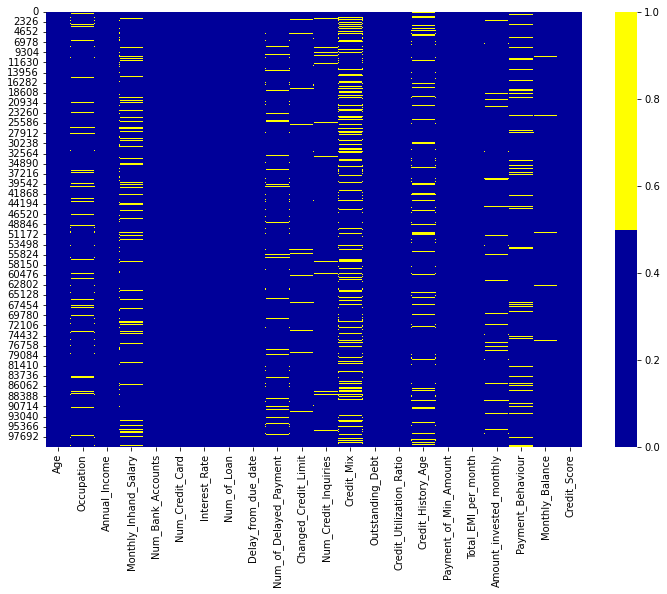

In [ ]:
# определяем цвета: желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

Процентный список пропущенных данных

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Age - 0%
Occupation - 7%
Annual_Income - 0%
Monthly_Inhand_Salary - 15%
Num_Bank_Accounts - 0%
Num_Credit_Card - 0%
Interest_Rate - 0%
Num_of_Loan - 0%
Delay_from_due_date - 0%
Num_of_Delayed_Payment - 7%
Changed_Credit_Limit - 2%
Num_Credit_Inquiries - 2%
Credit_Mix - 20%
Outstanding_Debt - 0%
Credit_Utilization_Ratio - 0%
Credit_History_Age - 9%
Payment_of_Min_Amount - 0%
Total_EMI_per_month - 0%
Amount_invested_monthly - 4%
Payment_Behaviour - 8%
Monthly_Balance - 1%
Credit_Score - 0%


Пропущенные значения в соответствующих столбцах придется считать выбросами и исключить из рассмотрения, так как непонятно, имеем ли мы право каким-то простым и разумным образом заполнить эти пропуски.

In [ ]:
df = df.dropna(axis=0)

Количество строк уменьшилось, но достаточно для выполнения нашей задачи.


In [ ]:
df.shape

(44662, 22)

Проверим есть ли строки в виде пробелов.

In [ ]:
df.applymap(lambda x: x == ' ').sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

Credit_History_Age имеет в формат "год месяц". Переведем его в месяцы.

In [ ]:
def to_month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])

        return (num1*12)+num2
    else:
        return x

df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: to_month_Converter(x)).astype(float)

Конвертируем типы данных столбцов.

In [ ]:
df.Age = df.Age.astype(int)
df.Annual_Income = df.Annual_Income.astype(float)
df.Num_of_Loan = df.Num_of_Loan.astype(int)
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.astype(float)
df.Changed_Credit_Limit = df.Changed_Credit_Limit.astype(float)
df.Outstanding_Debt = df.Outstanding_Debt.astype(float)
df.Amount_invested_monthly = df.Amount_invested_monthly.astype(float)
df.Monthly_Balance = df.Monthly_Balance.astype(float)

Категориальные признаки.

In [ ]:
categorical_columns = [c for c in df.columns if df[c].dtype == 'object']
categorical_columns

['Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

Числовые признаки.

In [ ]:
numerical_columns = [c for c in df.columns if df[c].dtype.name != 'object']
numerical_columns

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

Удалим выбросы.

In [ ]:
def remove_outlier(df):
    low = .005
    high = .99
    quant_df = df.quantile([low, high])
    # print(quant_df)
    for name in list(df[numerical_columns].columns):
      df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

df = remove_outlier(df)
df.shape

(24704, 22)

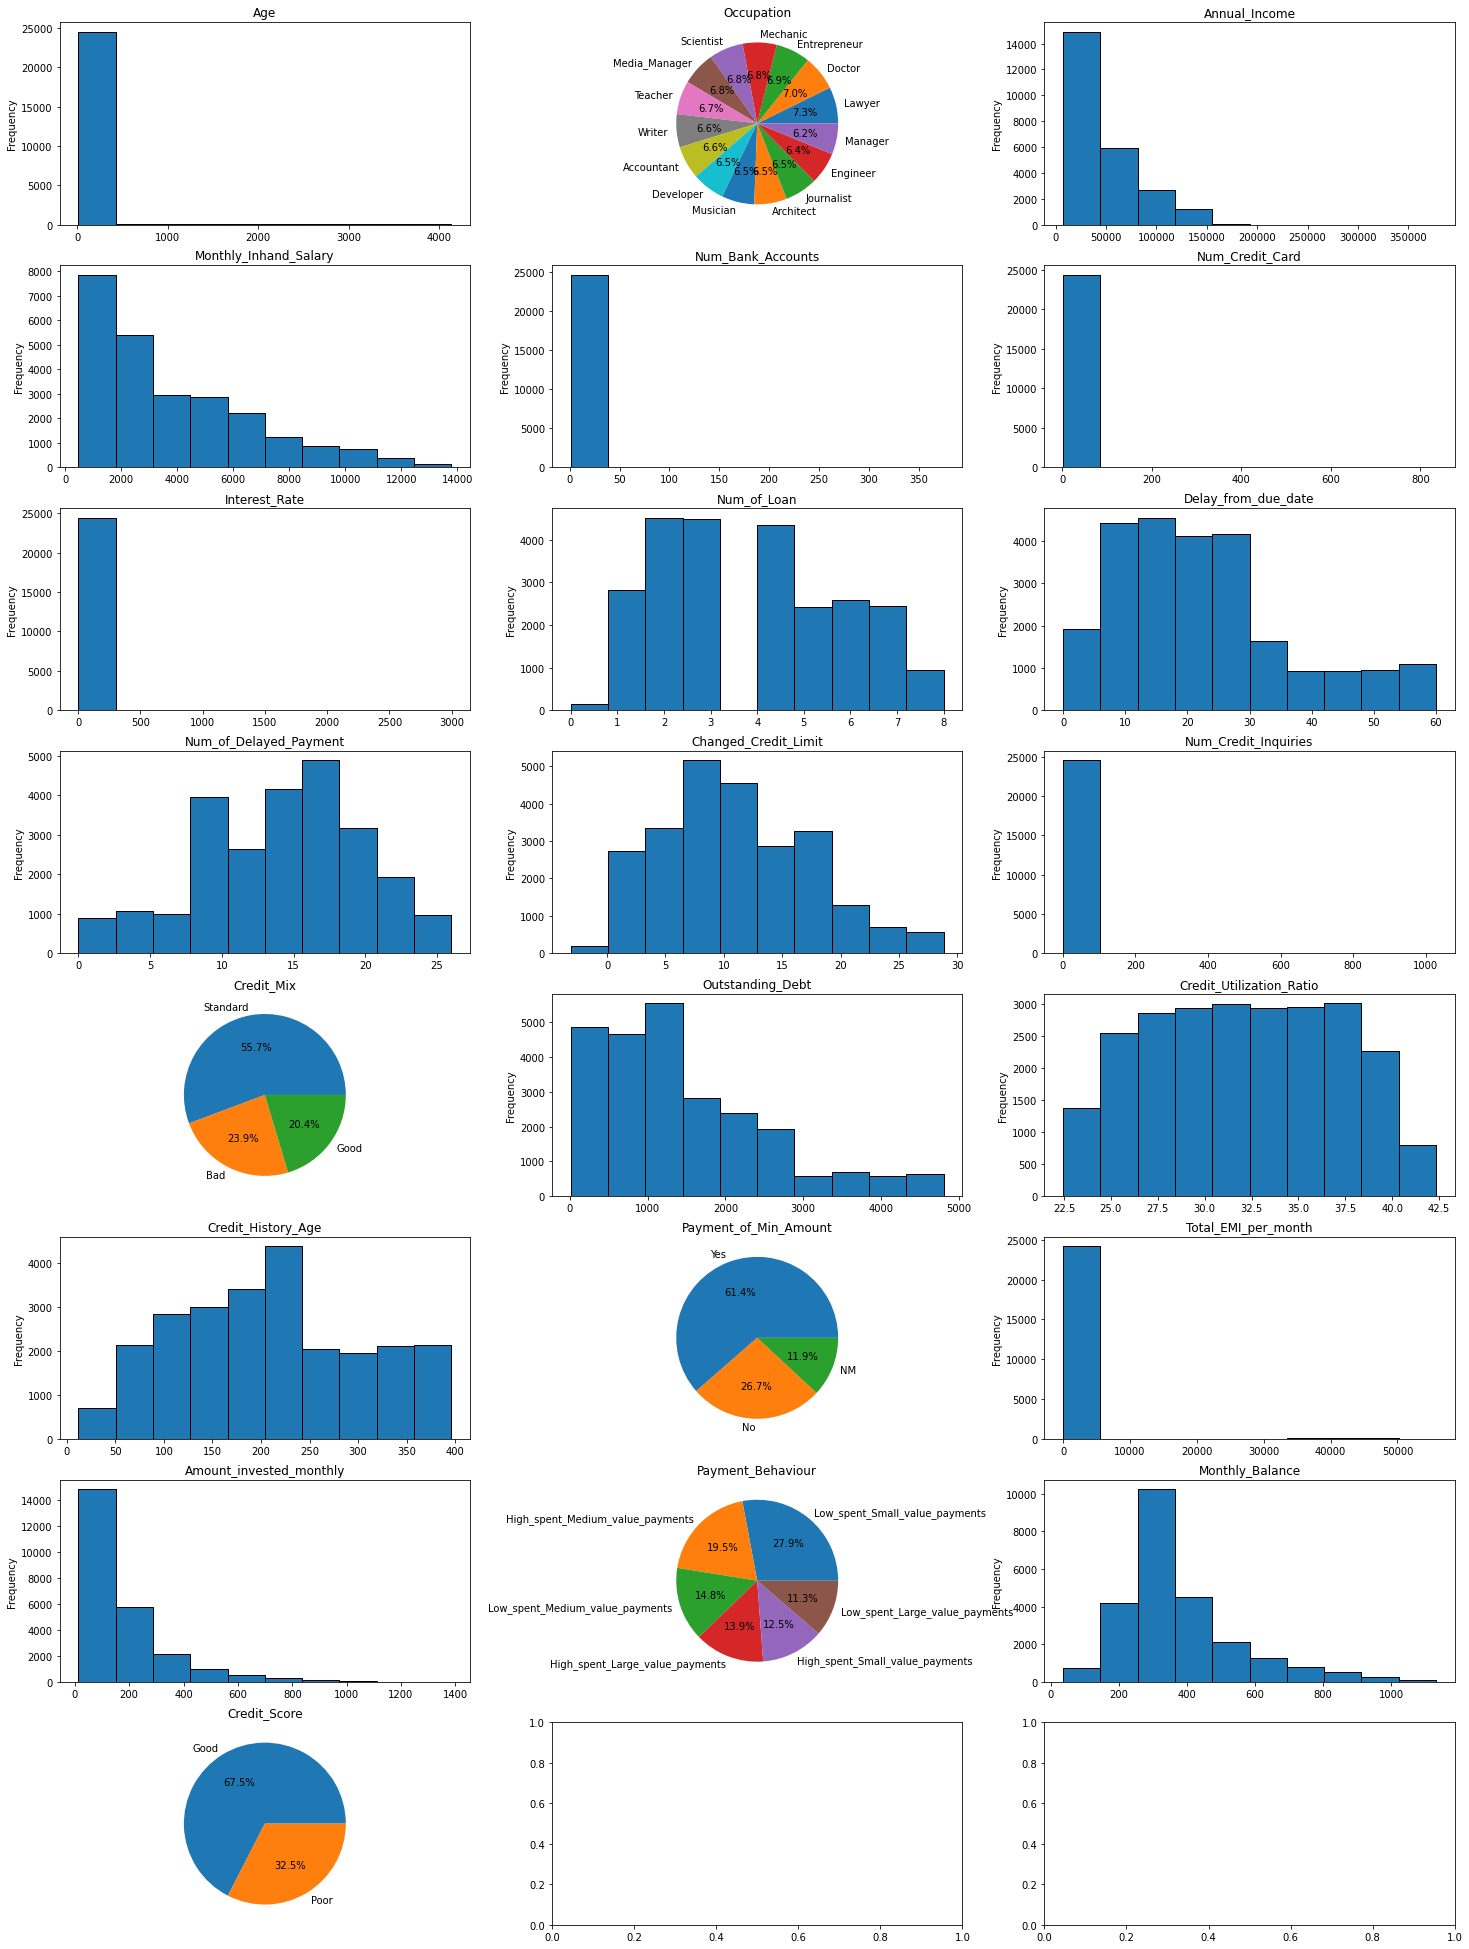

In [ ]:
fig, axes = plt.subplots(8, 3, figsize=(25, 35))
for ax, col in zip(axes.flatten(), df.columns):
    if col in categorical_columns:
        ax.set_title(col)
        ax.pie(df[col].value_counts(), autopct="%1.1f%%", labels=df[col].value_counts().index)
    else:
        ax.set_title(col)
        df[col].plot(kind="hist", ec="black", ax=ax)

Тепловая карта корреляции.

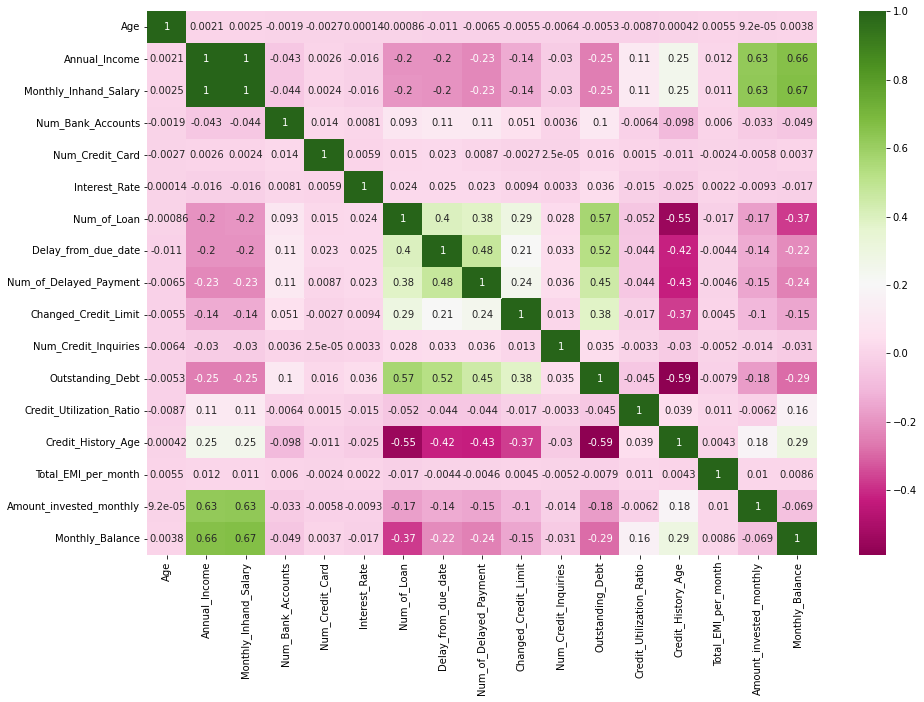

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr() , annot = True, cmap="PiYG")

Как видно из карты  наблюдается высокая корреляция между Monthly_Inhand_Salary и Annual_Income, поэтому удалим Monthly_Inhand_Salary из списка независимых столбцов, потому что мы можем вывести ту же информацию из Annual_Income.

In [ ]:
numerical_columns.remove('Monthly_Inhand_Salary')

In [ ]:
target_column = 'Credit_Score'
categorical_columns.remove(target_column)

# Постановка задачи и построение модели

Наша задача — создать модель машинного обучения, которая может классифицировать кредитный рейтинг.
Для проведения классификации будем использовать метод логистической регрессии.

Выполним кодирование категориальных признаков с помощью pd.get_dummies

In [ ]:
dummy_features = pd.get_dummies(df[categorical_columns])

Соединяем все полученные данные.

In [ ]:
X = pd.concat((df[numerical_columns], dummy_features), axis=1)

Кодируем target_column

In [ ]:
label_encoder = LabelEncoder()
df[target_column]= label_encoder.fit_transform(df[target_column])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df[target_column],
                                                    train_size=0.8,
                                                    random_state=42)

Измененим размер распределения значений так, чтобы среднее значение наблюдаемых значений было равно 0 с помощью  StandardScaler (стандартный масштабатор)

In [ ]:
scaler = StandardScaler()

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

Обучение модели логистической регрессии

In [ ]:
# Задаем массив возможных значений гиперпараметров
Cs = np.logspace(-5, 20, 100)
model = LogisticRegressionCV(Cs=Cs, random_state=777, refit=True, scoring='roc_auc')

model.fit(X_train, y_train)
best_C = model.C_[0]

Предсказание результатов с помощью обученной модели

In [ ]:
#предсказание с помощью обученной модели
y_pred = model.predict(X_test)
#вероятности отнесения к 0 и 1 классу объектов тестовых данных соответствнно
y_test_pred_probs = model.predict_proba(X_test)
#отбор вероятностей отнесения объектов к классу 1
y_test_pred_probs_class_1 = y_test_pred_probs[:, 1]

In [ ]:
# Покажем лучший гиперпараметр
best_C

0.03430469286314919

# Оценка модели и результатов

In [ ]:
#вычисление AUC
metrics.roc_auc_score(y_test, y_test_pred_probs_class_1 )

0.8002328217896417

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

In [ ]:
#вычисление Recall
metrics.recall_score(y_test, y_pred)

0.4701492537313433

In [ ]:
#вычисление Precision
metrics.precision_score(y_test, y_pred)

0.6637401229148375

Визуализируем ROC-кривую

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


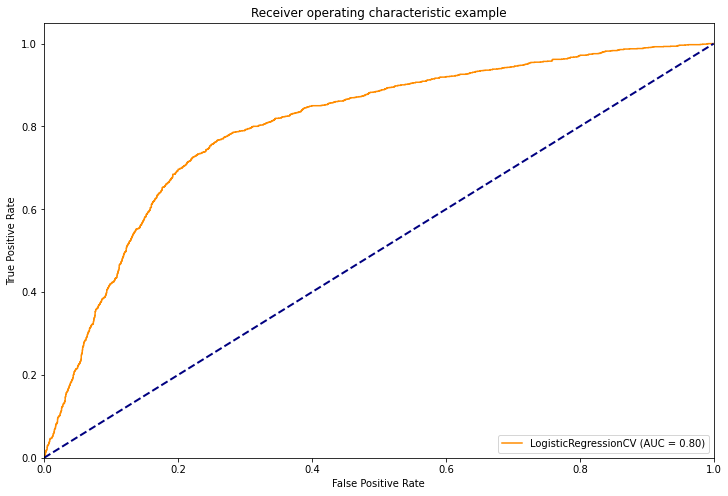

In [ ]:
metrics.plot_roc_curve(model, X_test, y_test, color='darkorange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

Вывод: поставленная цель достигнута - построена  модель машинного обучения, которая может классифицировать кредитный рейтинг. Значение AUC = 0.8 является удовлетворительным.